In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv(r'C:\Users\Ashutosh\Downloads\IEA Global EV Data 2024.csv')
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,3.900000e-04
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,5.500000e+01
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,3.100000e+01
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9.400000e+06
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,1.500000e+07


In [4]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [5]:
df.tail()

,region,category,parameter,mode,powertrain,year,unit,value
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55.0
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31.0
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000.0
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000.0
12653,World,Projection-STEPS,EV stock share,Trucks,EV,2035,percent,9.0


In [6]:
df.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [7]:
df.isnull().sum().sort_values()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [9]:
df.shape

(12654, 8)

In [10]:
df[df.duplicated()]

,region,category,parameter,mode,powertrain,year,unit,value


In [11]:
df.describe()

,year,value
count,12654.000000,1.265400e+04
mean,2019.822112,4.273742e+05
std,5.476494,6.860498e+06
min,2010.000000,1.200000e-06
25%,2016.000000,2.000000e+00
50%,2020.000000,1.300000e+02
75%,2022.000000,5.500000e+03
max,2035.000000,4.400000e+08


In [12]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
year,12654.000000,2019.822112,5.476494,2010.000000,2016.000000,2020.000000,2022.000000,2035.000000
value,12654.000000,427374.173498,6860498.318587,0.000001,2.000000,130.000000,5500.000000,440000000.000000


<Axes: >

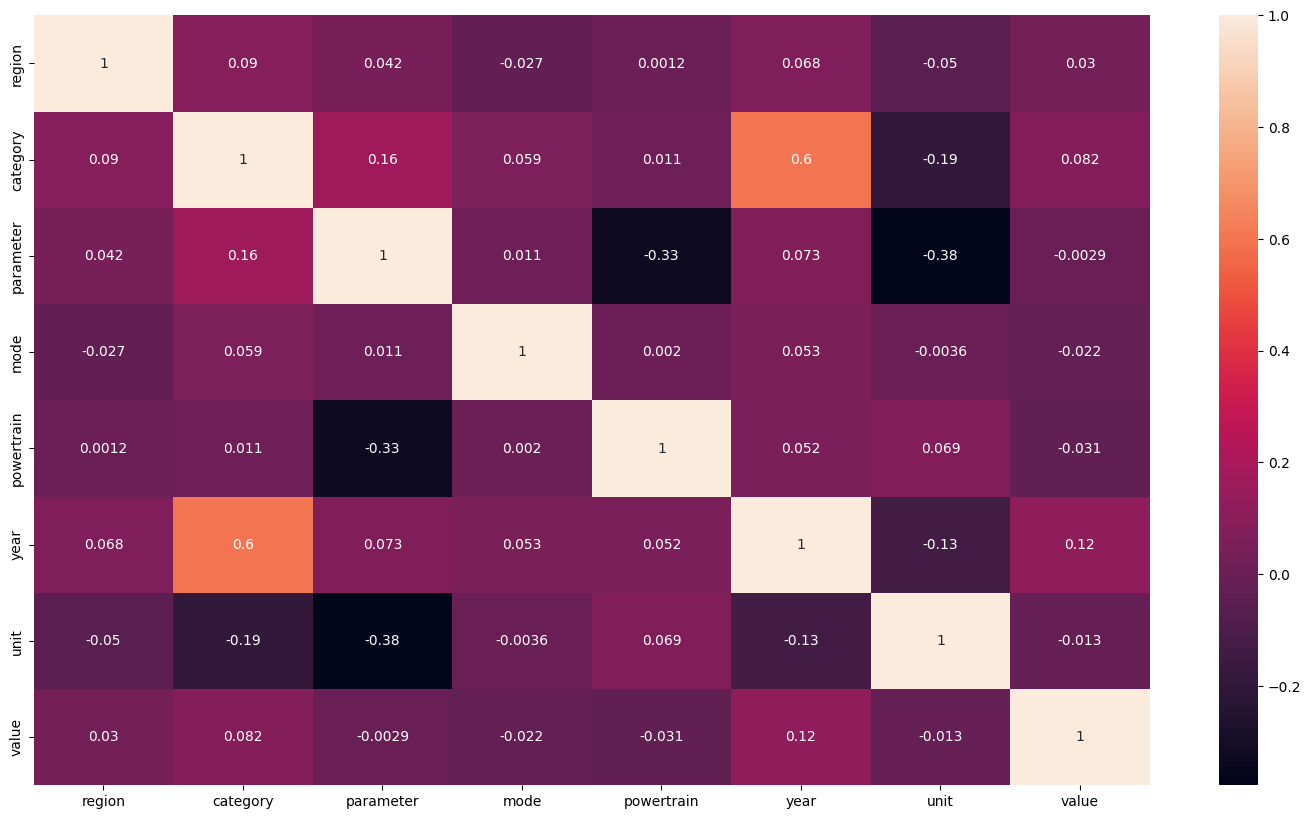

In [13]:
le = LabelEncoder()
df_numeric = df.copy()
columns_to_encode = ['region', 'category', 'parameter', 'mode', 'powertrain', 'unit']


for column in columns_to_encode:
    df_numeric[column] = le.fit_transform(df[column])

plt.figure(figsize=(18, 10))
sns.heatmap(df_numeric.corr(),annot=True)

In [14]:
print(df["region"].unique())
print(df["category"].unique())
print(df["parameter"].unique())
print(df["mode"].unique())
print(df["powertrain"].unique())
print(df["unit"].unique())

['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']
['Historical' 'Projection-STEPS' 'Projection-APS']
['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']
['Cars' 'EV' 'Buses' 'Vans' 'Trucks']
['EV' 'BEV' 'PHEV' 'Publicly available fast' 'Publicly available slow'
 'FCEV']
['percent' 'Vehicles' 'charging points' 'GWh' 'Milion barrels per day'
 'Oil displac

In [15]:
cars_df = df[df["mode"] == "Cars"]
ev_df = df[df["mode"] == "EV"]
buses_df = df[df["mode"] == "Buses"]
vans_df = df[df["mode"] == "Vans"]
trucks_df = df[df["mode"] == "Trucks"]

<Axes: xlabel='powertrain'>

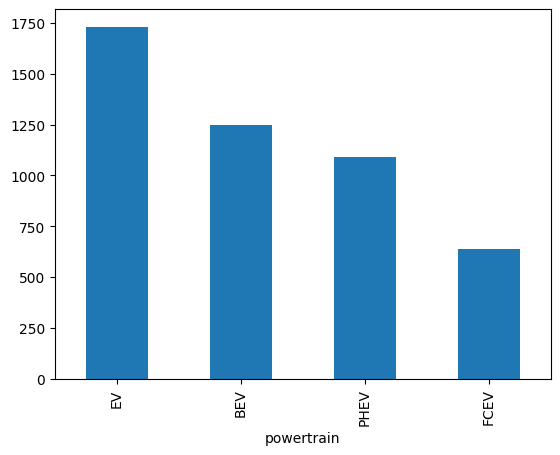

In [16]:
powertrain_counts = cars_df["powertrain"].value_counts()
powertrain_counts
powertrain_counts.plot(kind="bar")

<Axes: xlabel='powertrain'>

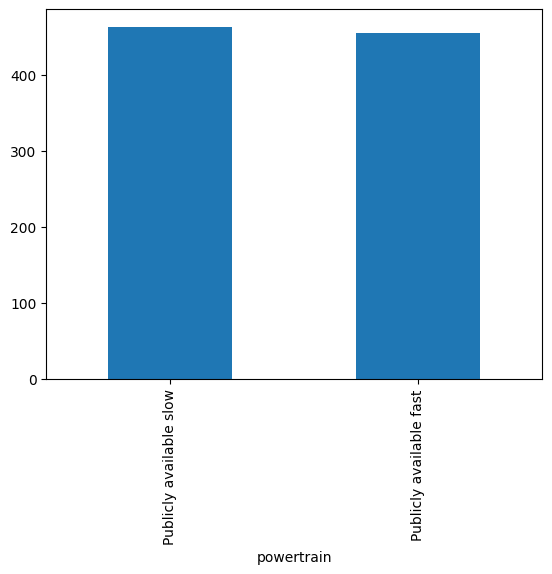

In [17]:
powertrain_counts = ev_df["powertrain"].value_counts()
powertrain_counts
powertrain_counts.plot(kind="bar")

<Axes: xlabel='powertrain'>

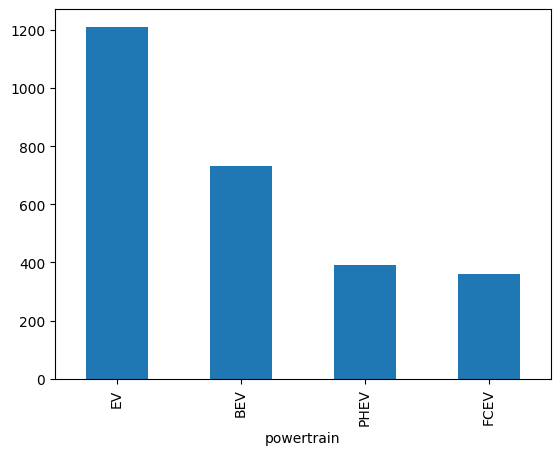

In [18]:
powertrain_counts = buses_df["powertrain"].value_counts()
powertrain_counts
powertrain_counts.plot(kind="bar")

<Axes: xlabel='powertrain'>

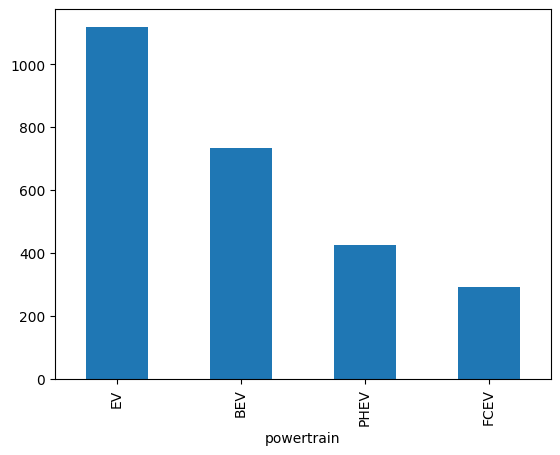

In [19]:
powertrain_counts = vans_df["powertrain"].value_counts()
powertrain_counts
powertrain_counts.plot(kind="bar")

<Axes: xlabel='powertrain'>

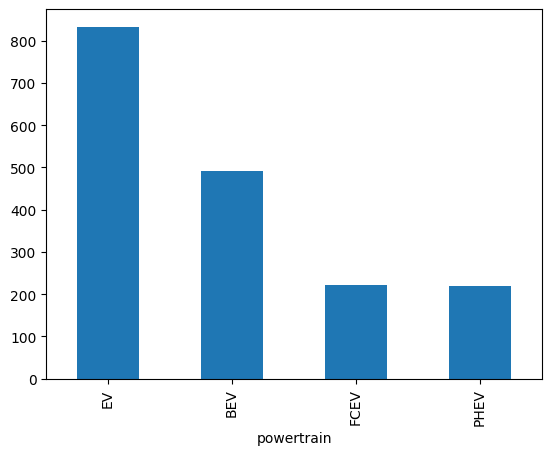

In [20]:
powertrain_counts = trucks_df["powertrain"].value_counts()
powertrain_counts
powertrain_counts.plot(kind="bar")

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_8636\722860758.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x='region', y='value', hue='mode', data=df_here, ci=None)


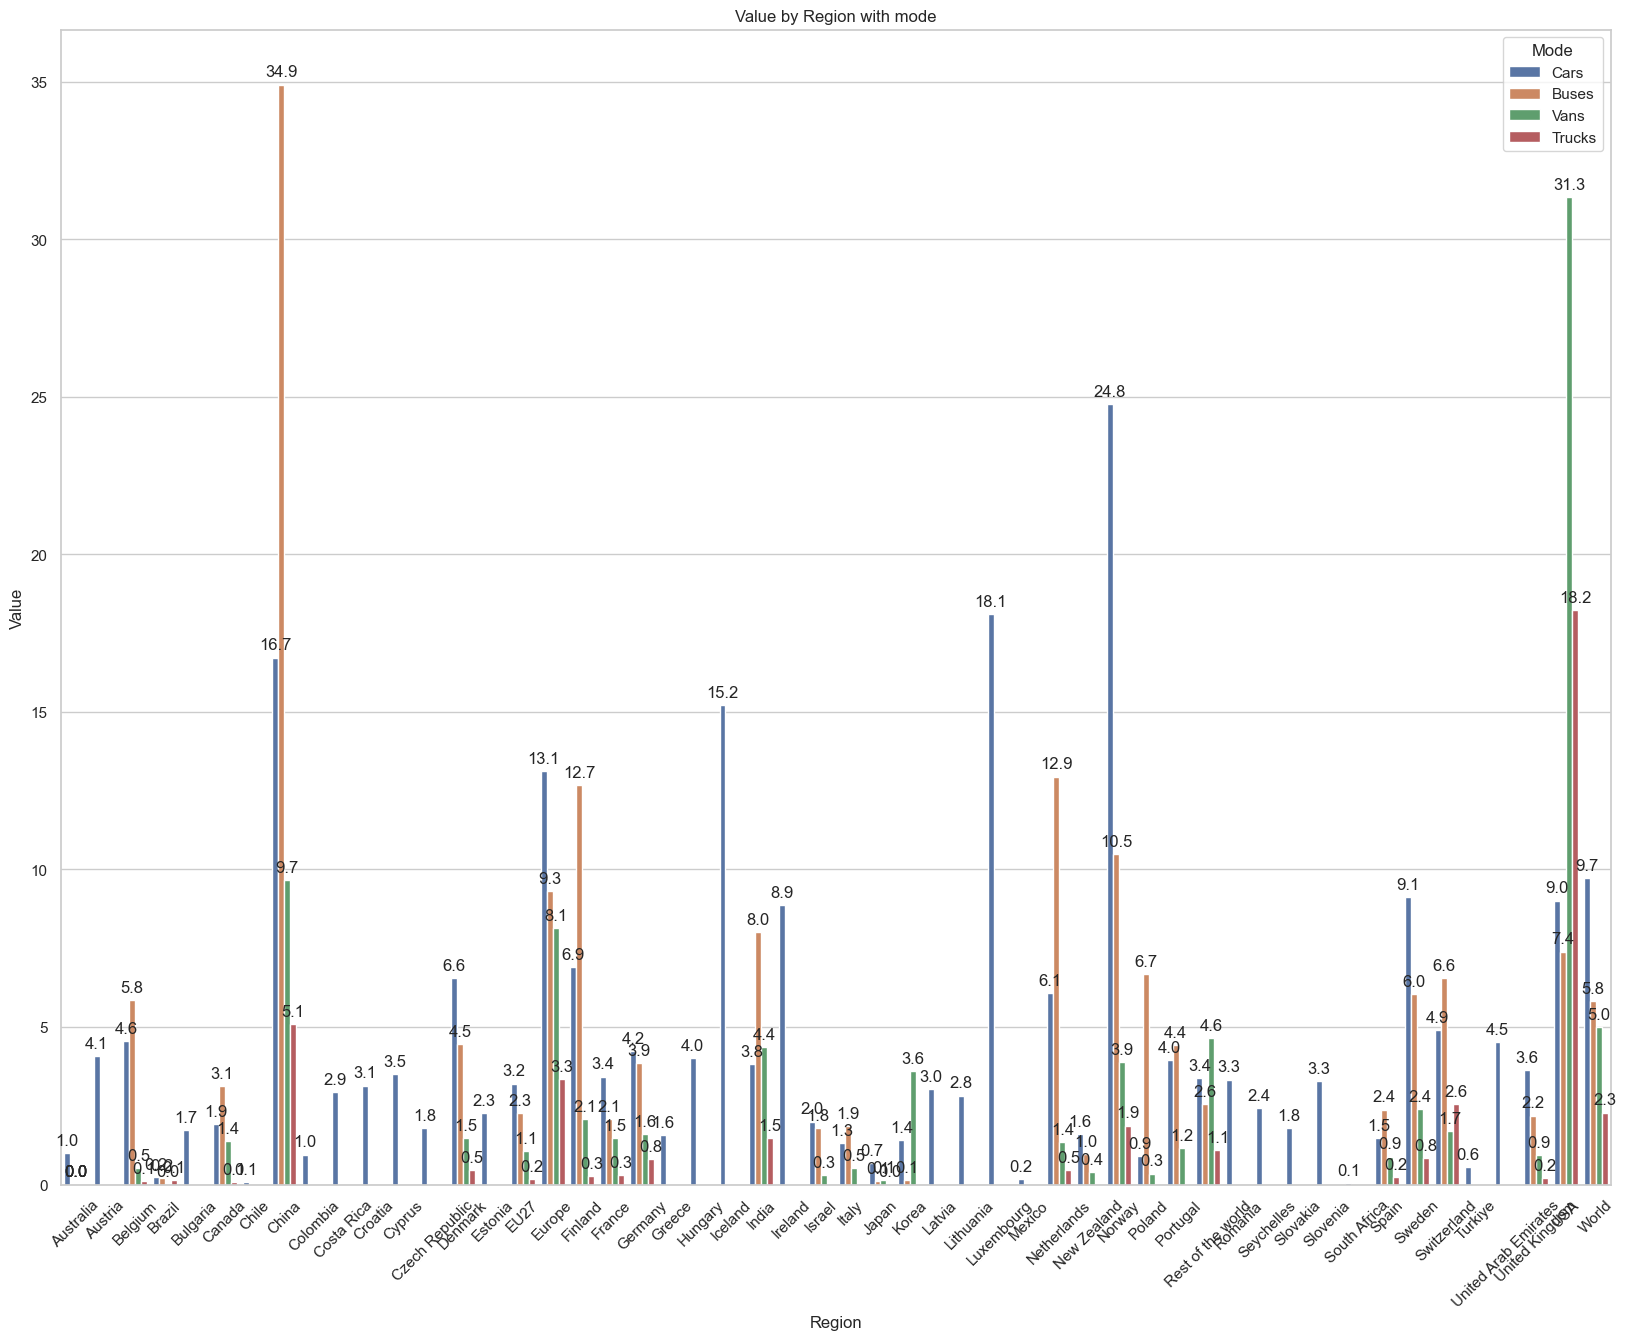

In [21]:
df_here = df[df['unit'] == 'percent']

plt.figure(figsize=(20, 15))
sns.set_theme(style="whitegrid")

bar_plot = sns.barplot(x='region', y='value', hue='mode', data=df_here, ci=None)

plt.title("Value by Region with mode")
plt.xlabel("Region")
plt.ylabel("Value")
plt.legend(title='Mode', loc='upper right')
plt.xticks(rotation=45)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')

plt.show()

In [22]:
Numerical= df.select_dtypes(exclude='object').columns.tolist()
Numerical

['year', 'value']

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_8636\467677510.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df[i],palette='coolwarm')


<Figure size 640x480 with 0 Axes>

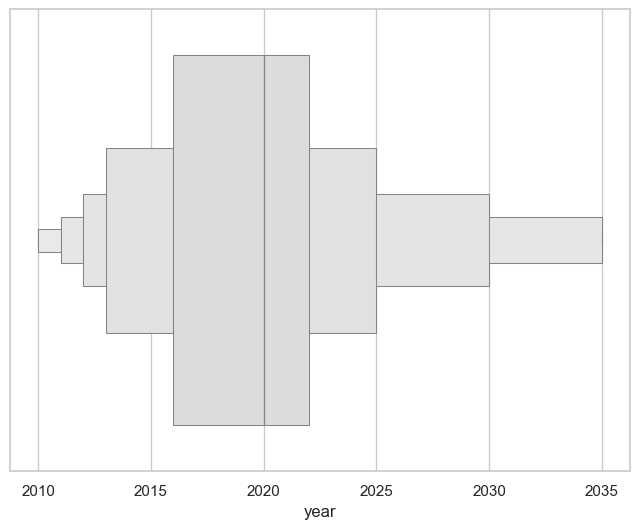

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_8636\467677510.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df[i],palette='coolwarm')


<Figure size 640x480 with 0 Axes>

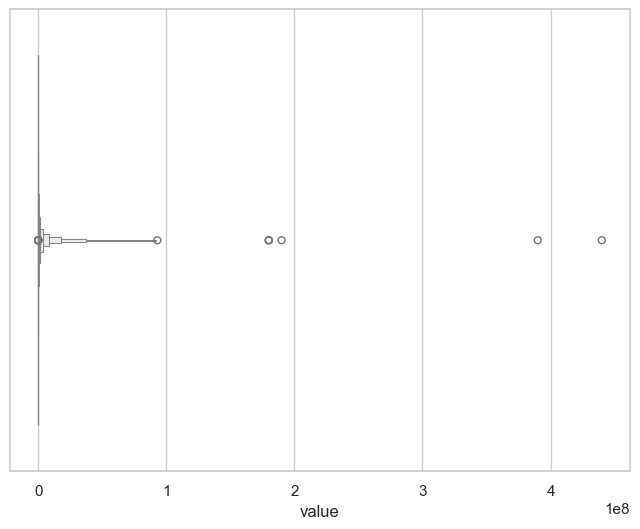

In [23]:
for i in Numerical:
    plt.figure()
    plt.tight_layout()

    plt.figure(figsize=(8,6))
    sns.boxenplot(x=df[i],palette='coolwarm')
    plt.show()

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_8636\2028741596.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.histplot(x= df[i], color='teal', bins= 15, kde= True, palette= 'twilight')


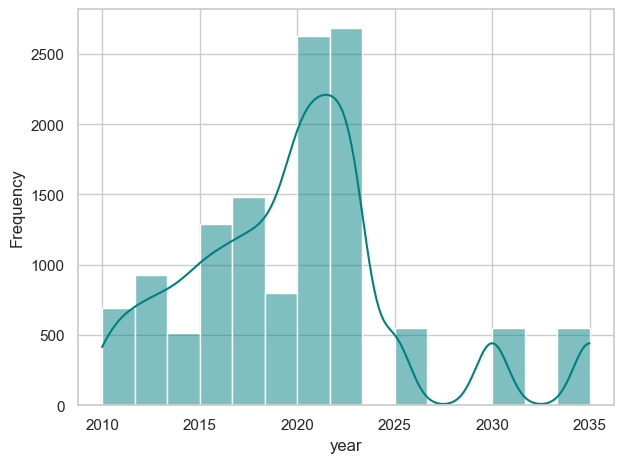

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_8636\2028741596.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax=sns.histplot(x= df[i], color='teal', bins= 15, kde= True, palette= 'twilight')


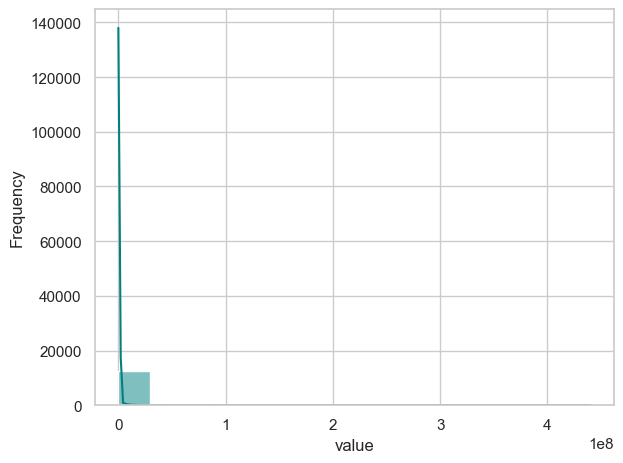

In [24]:
for i in Numerical:
    ax=sns.histplot(x= df[i], color='teal', bins= 15, kde= True, palette= 'twilight')
    ax.set(xlabel= i , ylabel= 'Frequency')

    plt.tight_layout()
    plt.show()

In [25]:
prediction_df = df[["year", "value"]]
prediction_df.reset_index(drop=True, inplace=True)
prediction_df
prediction_df.sort_values(by="year", inplace=True)
prediction_df.reset_index(drop=True, inplace=True)
prediction_df.groupby(["year"]).sum()

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_8636\2706429753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_df.sort_values(by="year", inplace=True)


,value
year,
2010,1.477092e+05
2011,3.926084e+05
2012,9.672729e+05
2013,1.786319e+06
2014,3.103426e+06
2015,5.739548e+06
2016,8.897600e+06
2017,1.357305e+07
2018,2.077615e+07


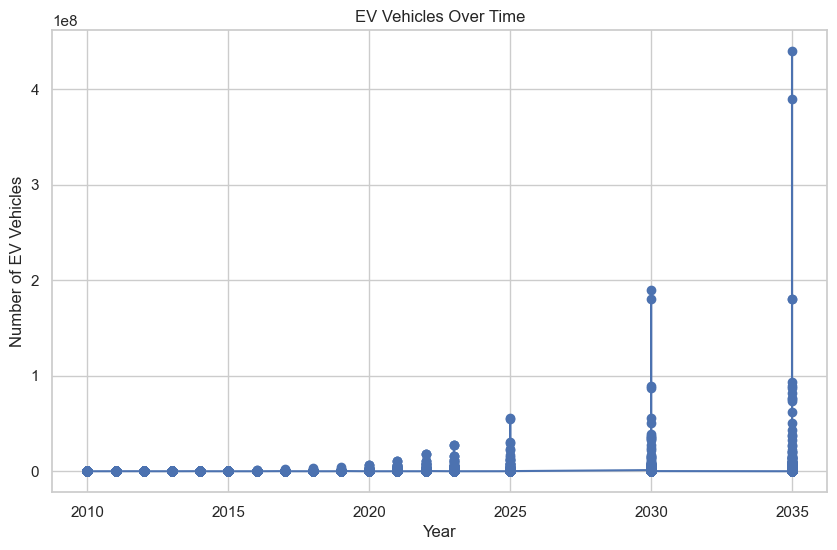

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(prediction_df['year'], prediction_df['value'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of EV Vehicles')
plt.title('EV Vehicles Over Time')
plt.grid(True)
plt.show()

In [27]:
X = prediction_df[["year"]]  # Feature
y = prediction_df["value"]  # Target variable

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Predict future values
future_years = pd.DataFrame({'year': [2040]})
future_predictions = model.predict(future_years)
print(f'Predicted EV Vehicles for Future Years: {future_predictions}')

Predicted EV Vehicles for Future Years: [3480575.0359199]


In [29]:
df_group = df.groupby(["region", "category", "parameter", "mode", "powertrain", "unit"]).mean()
df_group

year  \
region    category         parameter                     mode   powertrain              unit                                         
Australia Historical       EV charging points            EV     Publicly available fast charging points                2020.200000   
                                                                Publicly available slow charging points                2020.000000   
                           EV sales                      Cars   BEV                     Vehicles                       2017.000000   
                                                                FCEV                    Vehicles                       2022.000000   
                                                                PHEV                    Vehicles                       2017.500000   
...                                                                                                                            ...   
World     Projection-STEPS Oil displacement Mbd          Vans   EV                      Milion barrels per day         2025.142857   
                           Oil displacement, million lge Buses  EV                      Oil displacement, million lge  2025.142857   
                                                         Cars   EV                      Oil displacement, million lge  2025.142857   
                                                         Trucks EV                      Oil displacement, million lge  2025.142857   
                                                         Vans   EV                      Oil displacement, million lge  2025.142857   

                                                                                                                               value  
region    category         parameter                     mode   powertrain              unit                                          
Australia Historical       EV charging points            EV     Publicly available fast charging points                   310.200000  
                                                                Publicly available slow charging points                  1615.714286  
                           EV sales                      Cars   BEV                     Vehicles                        11823.769231  
                                                                FCEV                    Vehicles                           21.666667  
                                                                PHEV                    Vehicles                         2552.500000  
...                                                                                                                              ...  
World     Projection-STEPS Oil displacement Mbd          Vans   EV                      Milion barrels per day              0.212271  
                           Oil displacement, million lge Buses  EV                      Oil displacement, million lge    8285.714286  
                                                         Cars   EV                      Oil displacement, million lge  122857.142857  
                                                         Trucks EV                      Oil displacement, million lge   18008.571429  
                                                         Vans   EV                      Oil displacement, million lge   12400.000000  

[1487 rows x 2 columns]